# Detecció d'opinions

In [81]:
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')
from nltk.corpus import movie_reviews as mr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment import SentimentIntensityAnalyzer



[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Edu\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Edu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [64]:
for cat in mr.categories():
    print(cat, len(mr.fileids(cat)))

neg 1000
pos 1000


In [87]:
def preprocess(review):
    review = review.lower()
    # eliminate any character that is not a letter or a space
    review = ''.join(c for c in review if c.isalpha() or c == ' ')
    review = review.replace('\n', ' ')
    # convert all the words to its lemma
    lemmatizer = nltk.WordNetLemmatizer()
    
    #review = ' '.join(lemmatizer.lemmatize(word) for word in review.split())
    # remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    review = [w for w in review if w not in stopwords]
    review = ' '.join(review)
    return review

In [88]:
# create a CountVectorizer instance
vectorizer = CountVectorizer()
y = ["pos"]*1000 + ["neg"]*1000 
corpus = []
for rev in mr.fileids():
    corpus.append(preprocess(mr.raw(rev)))

In [89]:
print(corpus[0])
print(len(y))
print(len(corpus))
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)




p l     w   e e n   c u p l e   g       c h u r c h   p r     r n k   n   h e n   r v e     h e   g e   n   n   c c e n     n e   f   h e   g u   e     b u   h   g r l f r e n   c n n u e     e e   h   n   h e r   l f e     n   h   n g h r e     w h   h e   e l     w c h   h e   v e   n     r     f n   u         c r q u e       n f u c k   v e   f r   h e   e e n   g e n e r n   h   u c h e   n     v e r   c l   e     b u   p r e e n     n     v e r   b   p c k g e     w h c h     w h   k e   h   r e v e w   n   e v e n   h r e r   n e     w r e     n c e     g e n e r l l   p p l u   f l   w h c h   e p     b r e k   h e   l     e   w h   u r   h e   n   u c h     l   h g h w     e e n       b u   h e r e   r e   g   n   b   w   f   k n g   l l   p e   f   f l     n   h e e   f l k   j u   n   n g   h   n e   c r r e c l     h e   e e     h v e   k e n   h   p r e   n e   c n c e p     b u   e x e c u e     e r r b l       w h   r e   h e   p r b l e   w h   h e   v e     w e l l     

ValueError: empty vocabulary; perhaps the documents only contain stop words

## Utilitzant una Multinomial

In [53]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## Utilitzant Support Vector Machine

In [70]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Utilitzant random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [54]:
scores = {}

In [55]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
scores[str(classifier)] = accuracy

Accuracy: 0.82


In [59]:
# predict the category of a new review
new_review = "I love this movie, it is the best movie i have ever seen"
new_review = preprocess(new_review)
print(new_review)
new_review_vec = vectorizer.transform([new_review])
print(classifier.predict(new_review_vec))

i love this movie it is the best movie i have ever seen
['nig']


              precision    recall  f1-score   support

         nig       0.83      0.80      0.82       201
         pos       0.81      0.84      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



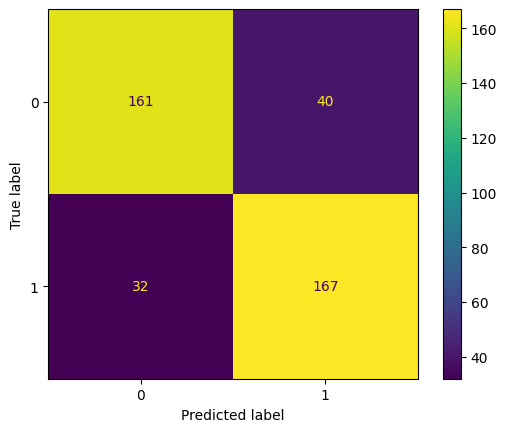

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
results = classifier.predict(X_test)
print(classification_report(y_test, results))
conf_matrix = confusion_matrix(y_test, results)
conf_matrix = ConfusionMatrixDisplay(conf_matrix)
conf_matrix.plot()
plt.show()


In [83]:
import pandas as pd
df = pd.DataFrame(scores, index=[0])
# set the first row name as "accuracy"
df = df.rename(index={0: "Accuracy:"})
df.head(1)


,MultinomialNB(),SVC(kernel='linear'),"RandomForestClassifier(n_estimators=25, random_state=42)"
Accuracy:,0.8225,0.8275,0.7075
